In [2]:
!pip install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('/content/winequality-white.csv', delimiter=';')

# Im just displaying the head real quick
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
# Make it look pretty
print("Columns:", df.columns)

#mean, min, max, and percentiles
print("\nMean:\n", df.mean())
print("\nMin:\n", df.min())
print("\nMax:\n", df.max())
print("\n25th percentile:\n", df.quantile(0.25))
print("\n50th percentile:\n", df.quantile(0.50))
print("\n75th percentile:\n", df.quantile(0.75))

print("\nSummary Statistics:\n", df.describe())

Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Mean:
 fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

Min:
 fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.2

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:



df.corr()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


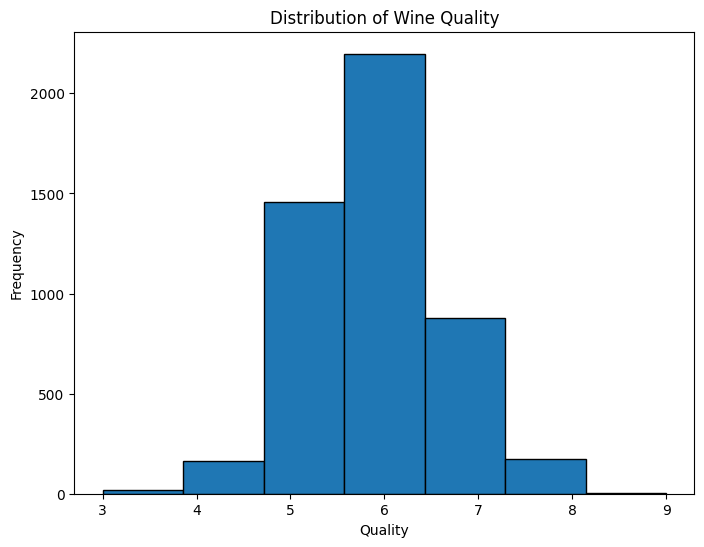

In [11]:
# histogram of the quality column
plt.figure(figsize=(8, 6))
df['quality'].plot.hist(edgecolor='black', bins=7)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

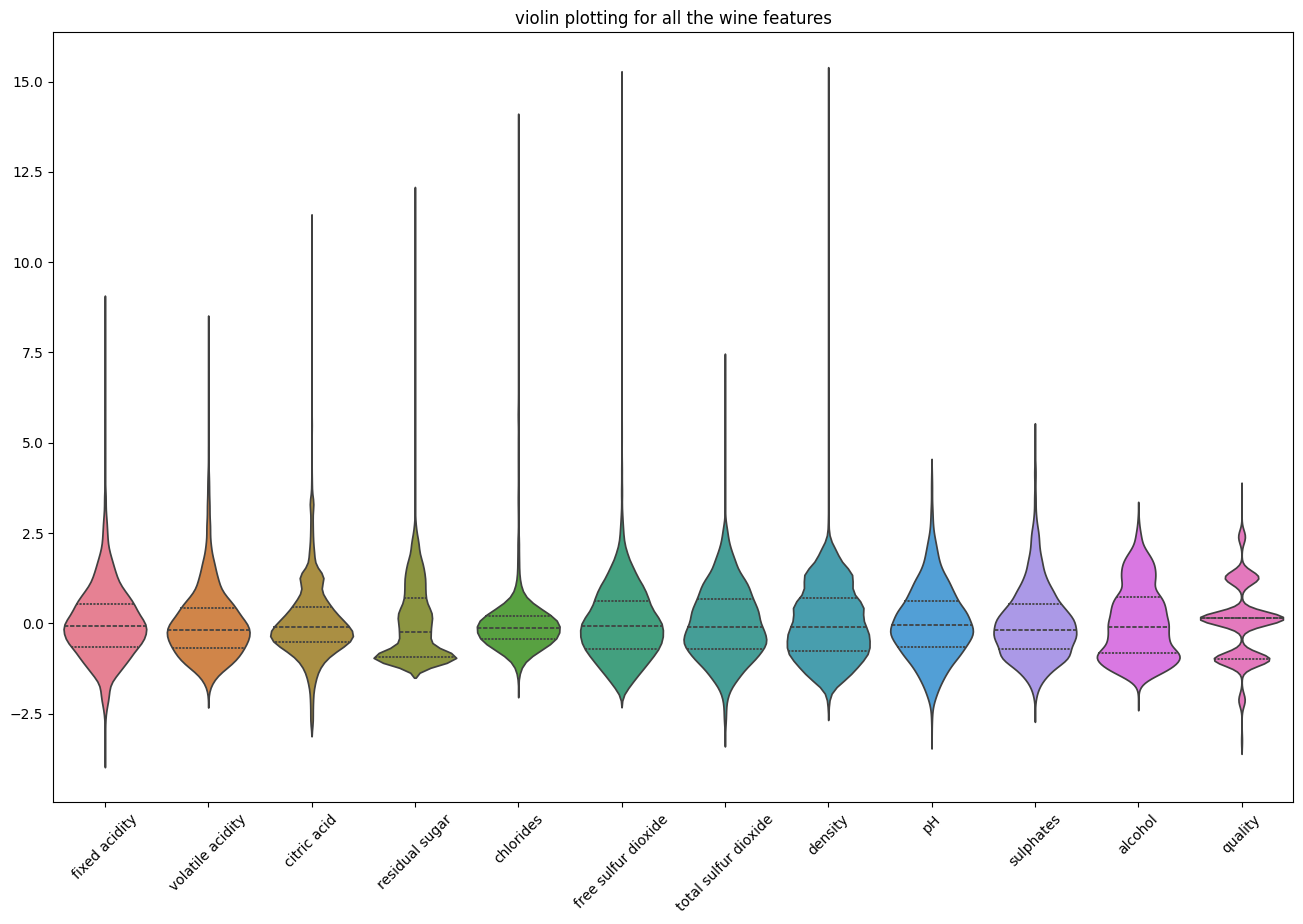

In [14]:
# 4. Illustrate the violin plots of all features. Make sure that each plot is visible.
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(16, 10))
sns.violinplot(data=scaled_data, inner='quartile')
plt.title('violin plotting for all the wine features')
plt.xticks(rotation=45)
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

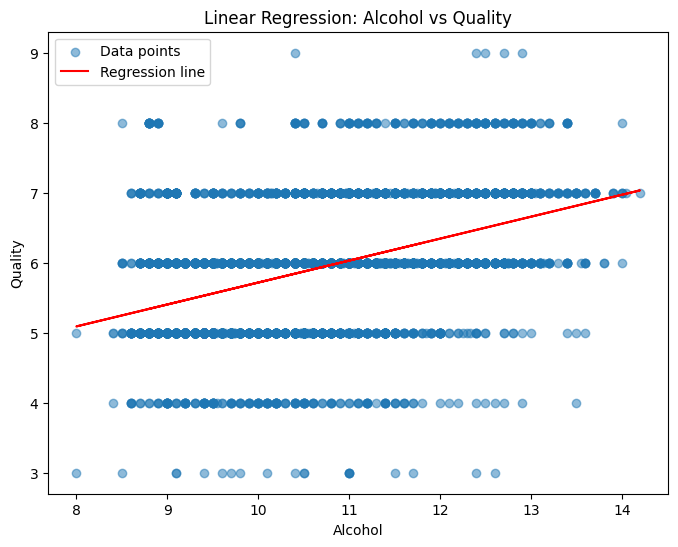

Intercept (b0): 2.582009399174922
Coefficient (b1): 0.3134693019118325
Root Mean Squared Error (RMSE): 0.7971284628753889
R-squared (R^2): 0.1897253327492563


In [19]:
#necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

white_wine = pd.read_csv('/content/winequality-white.csv', delimiter=';')

print(white_wine.head())


# we want x for alcohol and y for quality
X = white_wine[['alcohol']]
y = white_wine['quality']

# linear regression model
model = LinearRegression()

# training
model.fit(X, y)

# predictions
y_predict = model.predict(X)

# Meanful plots
plt.figure(figsize=(8, 6))  # sizing

plt.scatter(X, y, alpha=0.5, label='Data points')

# Simply just plotting regression
plt.plot(X, y_predict, color='red', label='Regression line')

# alcohol for x
plt.xlabel('Alcohol')

# Quality for y
plt.ylabel('Quality')

plt.title('Linear Regression: Alcohol vs Quality')

plt.legend()  # legend display data points and the regression line
plt.show()

# Output model parameters and performance metrics
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])

rmse = mean_squared_error(y, y_predict, squared=False)
r2 = r2_score(y, y_predict)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

In [21]:
X_multi = df[['volatile acidity', 'alcohol', 'density']]
y = df['quality']

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

#prediction
predicted_multi_quality = model_multi.predict(X_multi)

print(f'Intercept: {model_multi.intercept_}')
print(f'Coefficients: {model_multi.coef_}')

rmse_multi = mean_squared_error(y, predicted_multi_quality, squared=False)
r2_multi = r2_score(y, predicted_multi_quality)
print(f'RMSE: {rmse_multi}')
print(f'R^2: {r2_multi}')

Intercept: -36.498611307001624
Coefficients: [-2.07211594  0.39889282 38.99188669]
RMSE: 0.76848726881725
R^2: 0.24690635619896484
